<a href="https://colab.research.google.com/github/ZohebAbai/DeepLearning-Projects/blob/master/Pytorch_vs_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

## Pytorch

In [0]:
import torch
import torchvision

## Tensorflow

In [0]:
import tensorflow as tf

## Other useful python libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Handling

**[MNIST](http://yann.lecun.com/exdb/mnist/) dataset consists of a training set of 60,000 examples and a test set of 10,000 examples, where each example is a 28x28 grayscale image of handwritten digits, associated with a label from 0 to 9.**

**In Pytorch:** 
* Using transform while downloading the pixel values are both normalized to values between 0 and 1 and transformed as a tensor. 
*  Manually sample the validation dataset and load it as dataloader. 
* Mention batch size in Dataloader 
* One hot encoding of labels and final softmax activation is taken care by loss function

**In Tensorflow:**
* We normalize and transform to tensor separately after downloading the datasets.
* Splitting can be done automatically while fitting the model.
* Mention batch size while fitting
* One hot encoding of labels and final softmax activation needs to be performed separately.


## Pytorch

In [0]:
#create the transformer to transform the data as a tensor and normalize
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

#Create the train data
train_dataset_py = torchvision.datasets.MNIST(root = 'data/',
                                             download = True,
                                             train = True,
                                             transform = transforms)
#Create the test data
test_dataset_py = torchvision.datasets.MNIST(root = 'data/',
                                             download = True,
                                             train = False,
                                             transform = transforms)

0it [00:00, ?it/s]

9920512it [00:02, 3329402.71it/s]                            


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 48634.22it/s]                           
0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:02, 816718.38it/s]                             
0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 18399.78it/s]            

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


5


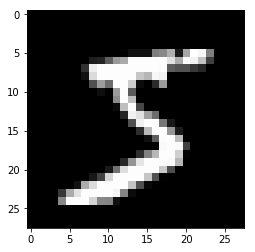

In [0]:
#Visualize an image from dataset
def imshowPytorch(img):
  npimg = img.numpy() #tensor to numpy
  plt.imshow(np.transpose(npimg, (1,2,0)))

image, label = train_dataset_py[0]
imshowPytorch(torchvision.utils.make_grid(image))
print(label)

In [0]:
#randomly shuffling and separating out a desired portion as validation
def split_indices(n, val_pct):
  
  #determine the size of validation set
  n_val = int(val_pct*n)
  
  #create random permutation of 0 to n-1
  idxs = np.random.permutation(n)
  
  #pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val]

train_indices, val_indices = split_indices(len(train_dataset_py), val_pct=0.20)

In [0]:
#create data loader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size=64

#Training sampler and dataloader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(train_dataset_py, batch_size,sampler= train_sampler)

#Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(train_dataset_py, batch_size, sampler= val_sampler)

#Test data loader
test_loader = DataLoader(test_dataset_py, batch_size, shuffle = False)

## Tensorflow

In [0]:
#load the dataset
mnist = tf.keras.datasets.mnist

#split to test and train
(train_images_tf, train_labels_tf), (test_images_tf, test_labels_tf) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


5


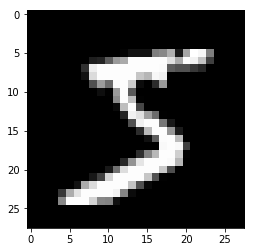

In [0]:
#Visualize an image from dataset
def imshowTensorFlow(img):
  plt.imshow(img,  cmap='gray')
  
imshowTensorFlow(train_images_tf[0])
print(train_labels_tf[0])

In [0]:
#Reshape the training dataset to 4D so that last digit can be describes as 
#channels which is 1 for greyscale images
train_images_tf = train_images_tf.reshape(train_images_tf.shape[0], 28, 28,1)
test_images_tf = test_images_tf.reshape(test_images_tf.shape[0], 28, 28,1)

#Convert the pixel values from int to float values
#Normalize the dataset as the pixel values are between 0 and 255
train_images_tf = train_images_tf.astype('float32')
test_images_tf = test_images_tf.astype('float32')
train_images_tf = train_images_tf/ 255.0
test_images_tf = test_images_tf/ 255.0

# Convert 1-dimensional class arrays to 10-dimensional class matrices
train_labels_tf = tf.keras.utils.to_categorical(train_labels_tf, 10, dtype='float32')
test_labels_tf = tf.keras.utils.to_categorical(test_labels_tf, 10, dtype='float32')

# Model Building

**Same Network Architecture**

## Pytorch

In [0]:
# Define the model
class NeuralNet(torch.nn.Module):
    def __init__(self, num_of_class):
        super(NeuralNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 64, kernel_size=3),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 64, kernel_size=3),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 64, kernel_size=3),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, num_of_class, kernel_size=3))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        return out

## Tensorflow

In [0]:
# Define the model
modeltf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.1,epsilon=1e-5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.1,epsilon=1e-5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.1,epsilon=1e-5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.1,epsilon=1e-5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(10, (3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Activation('softmax')
    ])

Instructions for updating:
Colocations handled automatically by placer.


# Model Training

**In Pytorch:**
* To train model on GPU you have to implement these steps for dataloader and model.
* To fit the model you need to define every steps that goes from training to calculate loss to backpropagation to optimization. Always reset the gradients after every update.

**In Tensorflow:**
* Tensorflow detects if GPU is on and trains on that automatically
* Everything works in the background, you just need to pass the parameters in compile and fit functions.

## Pytorch

### Using GPU

In [0]:
def get_default_device():
  """Pick GPUif available, else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

device = get_default_device()

In [0]:
def to_device(data, device):
  """Move tensors to chosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

In [0]:
class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device
    
  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)
      
  def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [0]:
#Wrap the data loader using DeviceDataLoader
train_dl = DeviceDataLoader(train_loader, device)
valid_dl = DeviceDataLoader(val_loader, device)
test_dl = DeviceDataLoader(test_loader, device)

### Training the Model

In [0]:
# Evaluation Metric
def accuracy(outputs, labels):
  #determine the predicted label for each image by simply choosing 
  #the index of the element with the highest probability in each output row.
  _,preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  
  #Calculate loss
  preds = model(xb)
  loss = loss_func(preds, yb)
  
  if opt is not None:
    #Compute gradients
    loss.backward()
    #Update parameters
    opt.step()
    #Reset gradients
    opt.zero_grad()
    
  metric_result = None
  if metric is not None:
    #compute metric
    metric_result = metric(preds, yb)
      
  return loss.item(), len(xb), metric_result

In [0]:
def evaluate(model, loss_fn, dl, metric=None):
  with torch.no_grad():
    
    #Pass each batch through the model
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb in dl]
    
    #Separate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    
    #Total size of dataset
    total = np.sum(nums)
    
    #Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums)) / total
    avg_metric = None
    if metric is not None:
      #avg of metric across batches
      avg_metric = np.sum(np.multiply(metrics, nums)) / total
  
  return avg_loss, total, avg_metric

In [0]:
def fit(epochs, lr, model, loss_fn, train_dl, 
        valid_dl, metric=None, opt_fn=None):
  
  losses, metrics = [],[]
  
  #Instantiate the optimizer
  if opt_fn is None: opt_fn = torch.optim.Adam
  opt = torch.optim.Adam(model.parameters(), lr=lr)
  
  for epoch in range(epochs):
    #Training
    for xb, yb in train_dl:
      train_loss,_,train_acc = loss_batch(model, loss_fn, xb, yb, opt, metric)
    
    #Evaluation
    val_loss,_, val_acc = evaluate(model, loss_fn, valid_dl, metric)
    
    #Record the loss and metric
    losses.append(val_loss)
    metrics.append(val_acc)
    
    #Print progress
    if metric is None:
      print('Epoch [{}/{}], Train_Loss: {:.4f}, Val_Loss: {:.4f}'.format
           (epoch+1, epochs, train_loss, val_loss))
    else:
      print('Epoch [{}/{}], Train_Loss: {:.4f}, Train_Acc {:.4f}, Val_Loss: {:.4f}, Val_Acc: {:.4f}'.format
           (epoch+1, epochs, train_loss, train_acc, val_loss, val_acc))
      
  return losses, metrics

In [0]:
%%time
#Lets fit the model
modelpy = NeuralNet(num_of_class=10)
to_device(modelpy, device)

#Fit
losses, metrics = fit(10, 0.001, modelpy, torch.nn.CrossEntropyLoss(), train_dl, valid_dl, metric=accuracy)

Epoch [1/10], Train_Loss: 0.1842, Train_Acc 0.9531, Val_Loss: 0.0441, Val_Acc: 0.9873
Epoch [2/10], Train_Loss: 0.0200, Train_Acc 1.0000, Val_Loss: 0.0370, Val_Acc: 0.9893
Epoch [3/10], Train_Loss: 0.0008, Train_Acc 1.0000, Val_Loss: 0.0322, Val_Acc: 0.9902
Epoch [4/10], Train_Loss: 0.0329, Train_Acc 0.9844, Val_Loss: 0.0359, Val_Acc: 0.9890
Epoch [5/10], Train_Loss: 0.0043, Train_Acc 1.0000, Val_Loss: 0.0345, Val_Acc: 0.9907
Epoch [6/10], Train_Loss: 0.0096, Train_Acc 1.0000, Val_Loss: 0.0326, Val_Acc: 0.9918
Epoch [7/10], Train_Loss: 0.0002, Train_Acc 1.0000, Val_Loss: 0.0336, Val_Acc: 0.9905
Epoch [8/10], Train_Loss: 0.0105, Train_Acc 1.0000, Val_Loss: 0.0366, Val_Acc: 0.9912
Epoch [9/10], Train_Loss: 0.0050, Train_Acc 1.0000, Val_Loss: 0.0458, Val_Acc: 0.9878
Epoch [10/10], Train_Loss: 0.0004, Train_Acc 1.0000, Val_Loss: 0.0322, Val_Acc: 0.9918
CPU times: user 1min 28s, sys: 5.24 s, total: 1min 33s
Wall time: 1min 37s


### Visualization

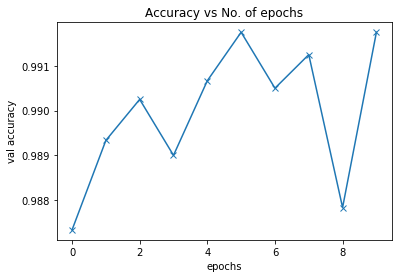

In [0]:
plt.plot(metrics, '-x')
plt.xlabel('epochs')
plt.ylabel('val accuracy')
plt.title('Accuracy vs No. of epochs')
plt.show()

## Tensorflow

### Training the Model

In [0]:
#Build the model
modeltf.compile(loss='categorical_crossentropy',
                optimizer='adam', 
                metrics=['accuracy'])

In [0]:
%%time
#Lets fit the model
history = modeltf.fit(train_images_tf, train_labels_tf, 
                      batch_size=64, epochs=10, 
                      validation_split=0.2, 
                      shuffle=True)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
48000/48000 [==============================] - 8s 161us/sample - loss: 0.1061 - acc: 0.9686 - val_loss: 0.0468 - val_acc: 0.9855
Epoch 2/10
48000/48000 [==============================] - 7s 146us/sample - loss: 0.0323 - acc: 0.9904 - val_loss: 0.0400 - val_acc: 0.9881
Epoch 3/10
48000/48000 [==============================] - 7s 155us/sample - loss: 0.0211 - acc: 0.9937 - val_loss: 0.0366 - val_acc: 0.9896
Epoch 4/10
48000/48000 [==============================] - 7s 151us/sample - loss: 0.0152 - acc: 0.9951 - val_loss: 0.0316 - val_acc: 0.9909
Epoch 5/10
48000/48000 [==============================] - 7s 146us/sample - loss: 0.0128 - acc: 0.9962 - val_loss: 0.0374 - val_acc: 0.9887
Epoch 6/10
48000/48000 [==============================] - 7s 146us/sample - loss: 0.0113 - acc: 0.9963 - val_loss: 0.0342 - val_acc: 0.9896
Epoch 7/10
48000/48000 [==============================] - 7s 1

### Visualization

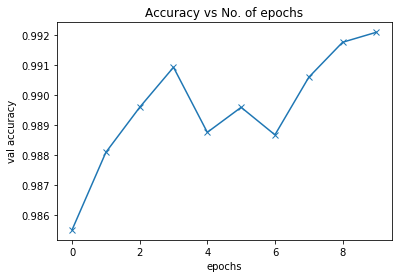

In [0]:
plt.plot(history.history['val_acc'], '-x')
plt.xlabel('epochs')
plt.ylabel('val accuracy')
plt.title('Accuracy vs No. of epochs')
plt.show()

# Model Testing

## Pytorch

In [0]:
test_loss, _, test_acc = evaluate(modelpy, torch.nn.CrossEntropyLoss(), test_dl, metric=accuracy)
print('Test Loss: {:.4f}, Test Accuracy: {:.4f}'.format (test_loss, test_acc))

Test Loss: 0.0204, Test Accuracy: 0.9929


## Tensorflow

In [0]:
test_loss, test_acc = modeltf.evaluate(test_images_tf, test_labels_tf)
print('Test Loss: {:.4f}, Test Accuracy: {:.4f}'.format(test_loss, test_acc))

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0329 - acc: 0.9928
Test Loss: 0.0329, Test Accuracy: 0.9928


# Save and Load the Model

## Pytorch

In [0]:
torch.save(modelpy, 'modelpy.pt')
model_load_py = torch.load("modelpy.pt")
model_load_py

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


NeuralNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(64, 10, kernel_size=(3, 3), stride=(1, 1))
  )
)

## Tensorflow

In [0]:
modeltf.save('modeltf.h5')
model_load_tf = tf.keras.models.load_model('modeltf.h5')
model_load_tf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
__________

#Conclusion

Both Deep Learning libraries have their own advantages and disadvantages. Go through this Fast.ai article[https://www.fast.ai/2017/09/08/introducing-pytorch-for-fastai/] for concluding.